In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 0. Get some data and choose some features 

In [2]:
df = pd.read_excel('./data/churn.xls', sheet_name='churn')

In [3]:
df.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [4]:
df.columns

Index(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Churn', 'Int'l Plan', 'VMail Plan',
       'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls',
       'Night Charge', 'Intl Calls', 'Intl Charge', 'State', 'Area Code',
       'Phone'],
      dtype='object')

In [5]:
y = df['Churn']
X = df[['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls',  "Int'l Plan", 'VMail Plan',
       'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls',
       'Night Charge', 'Intl Calls', 'Intl Charge']]

### 1. Train test split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=123, train_size=0.8)

### 2. Choose a model and train it

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
logreg = LogisticRegression()

In [10]:
logreg.fit(X_train, y_train)

C:\Users\HP\Anaconda3\envs\a1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### 3. What is this model doing? Evaluate on the test set!

In [11]:
y_pred = logreg.predict(X_test)

In [12]:
y_pred[:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [13]:
y_test[:5]

465     1
2416    0
1785    0
1316    0
446     0
Name: Churn, dtype: int64

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[557,  15],
       [ 76,  19]], dtype=int64)

In [16]:
y_proba = logreg.predict_proba(X_test)

In [17]:
y_proba

array([[0.40888424, 0.59111576],
       [0.88621176, 0.11378824],
       [0.96919349, 0.03080651],
       ...,
       [0.78455336, 0.21544664],
       [0.8082661 , 0.1917339 ],
       [0.87967339, 0.12032661]])

In [18]:
threshold = 0.2
y_new_pred = [1 if val>threshold else 0 for val in y_proba[:,1]]

In [19]:
confusion_matrix(y_true=y_test, y_pred=y_new_pred)

array([[476,  96],
       [ 24,  71]], dtype=int64)

A perfect model would have non-zero entries on the diagonal, but zero outside (no false positives / no false negatives).

### How to improve the model?

- Use raw probabilities for calculating churn/no churn.
- Select some of the variables => more or less automated.
- Adding some preprocessing, e.g. clustering.
- Do we need more data or do we need better algorithm? => Learning curve.

### Coming soon... 

- What makes the model work? Why some predictions are made (both globally and individually).

To calculate feature importance in logistic regression we use the coefficients * standard deviation in the corresponding column.

In [20]:
X.shape

(3333, 17)

In [21]:
import numpy as np

In [22]:
# Feature importances
np.std(X)*logreg.coef_[0]

Account Length    0.029362
VMail Message     0.290407
Day Mins          0.570442
Eve Mins          0.319786
Night Mins        0.064855
Intl Mins         0.123828
CustServ Calls    0.596868
Int'l Plan        0.530224
VMail Plan       -0.668365
Day Calls        -0.039210
Day Charge        0.069361
Eve Calls        -0.031183
Eve Charge       -0.061403
Night Calls      -0.106542
Night Charge     -0.011715
Intl Calls       -0.269280
Intl Charge       0.019140
dtype: float64

In [24]:
logreg.coef_[0]

array([ 7.37446615e-04,  2.12187818e-02,  1.04746564e-02,  6.30663664e-03,
        1.28256764e-03,  4.43602738e-02,  4.53790942e-01,  1.79229849e+00,
       -1.49411811e+00, -1.95406430e-03,  7.49198819e-03, -1.56544694e-03,
       -1.42465547e-02, -5.44537704e-03, -5.14819754e-03, -1.09425835e-01,
        2.53962511e-02])

### Look at correlations (using a heatmap)

In [25]:
import seaborn as sns

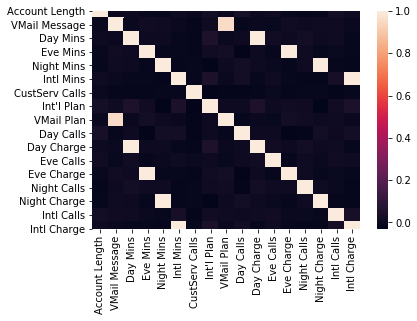

In [27]:
sns.heatmap(X.corr())

### Univariate feature selection

In [29]:
from sklearn.feature_selection import SelectKBest

In [30]:
sel = SelectKBest(k=5) # Defines that we want k features from our data

In [31]:
sel.fit(X,y) # .fit() makes the algorithm aware of your data

SelectKBest(k=5, score_func=<function f_classif at 0x00000285257D6EE8>)

In [39]:
X_new = sel.transform(X)

In [36]:
chosen_features = sel.get_support()

In [43]:
chosen_features

array([False, False,  True, False, False, False,  True,  True,  True,
       False,  True, False, False, False, False, False, False])

In [37]:
X.columns[chosen_features] # This is some pandas-specific magic

Index(['Day Mins', 'CustServ Calls', 'Int'l Plan', 'VMail Plan', 'Day Charge'], dtype='object')

### Retry with X_new ?

In [44]:
X_train_new, X_test_new, y_train, y_test
 = train_test_split(X_new, y, random_state=123, train_size=0.8)

In [46]:
logreg.fit(X_train_new, y_train)

C:\Users\HP\Anaconda3\envs\a1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
y_pred_new = logreg.predict(X_test_new)

In [48]:
confusion_matrix(y_test, y_pred_new)

array([[560,  12],
       [ 79,  16]], dtype=int64)